##                            Telco Customer Churn Prediction:

Telco receives a lot of customers who subscribe to their service to get access to the fast communication access through mobile and internet services.

One of The biggest challenge a Telecom industry can Experiance when customers are leaving their services due to some Factors like Increase in monthly charges or Poor service or security etc.
The Main objective of this Project is to find the reasons behind the customers who are leaving the service. so that the company can target those customers with some affordable plans to retain those customers.



### Steps Performed

1. Imported all necessary libraries.
2. Import and analysed the dataset.
3. Checked Null values in the columns and filled with mean.
4. Converted a categorical column into integer.
5. Performed Univariate and Bivariate Analysis on the Dataset.
6. Checked the correlation between the independent variables
7. Converted all Categorical columns into Dummy variables.
8. Balanced the dataset using Smote technique
9. Split the data into Training and Validation set.
10. Performed Feature Scaling.
11. Applied some of the Machine learning Classification Algorithms to predict wheater a customer will churn(leave the service) or not.



___

### Importing Required Libraries

In [1]:
#importing the required libraries

import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix



### Loading the Dataset

In [2]:
# importing the dataset and storing it in data

data = pd.read_csv(r"C:\Users\hussa\Downloads\Churn Prediction dataset.csv")


### Inspecting the Dataset

In [3]:
# checking first 5 rows of our dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:

pd.set_option('display.max_columns',32)
pd.set_option('display.max_rows',50)


In [6]:
# checking summary of numerical columns

data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# checking info of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#checking all columns in the dataset

data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# checking the distinct values in each categorical columns

for col in data:
    if data[col].dtypes=='object':
        print(f'{col} : {data[col].unique()}')
    

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [10]:

data.replace('No internet service','No',inplace=True)

In [11]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
data['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [14]:
# checking no. of null values 

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# checking no.of duplicate columns

len(data[data.duplicated()])

0

In [16]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Checking Percentage of Churners and Non Churners

In [17]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

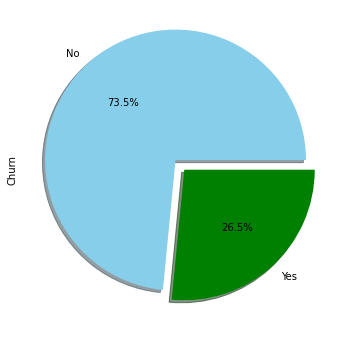

In [18]:
# percentage of churners and non churners

plt.figure(figsize=(8,6))
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%',explode=(0.1,0),colors= ('skyblue','green'),shadow=True)
plt.show()

##### We have 73% of custemers who are non churners and only 27% of customers who are going to churn. 

### Pie Chart of Customers having MultipleLines

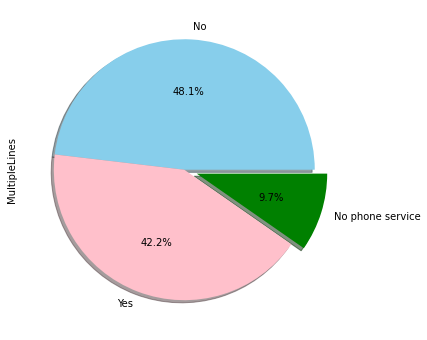

In [19]:

plt.figure(figsize=(8,6))
data['MultipleLines'].value_counts().plot.pie(autopct='%1.1f%%',explode=(0,0,0.1),colors= ('skyblue','pink','green'),shadow=True)
plt.show()

42% of Customers are having Multiple lines, they might be not fully satisfied by the service provided by the Telco company

In [20]:
# writing a function which plot countplot of each feature
def countplot_function(dataframe, column, figsize = (9,6), palette = "viridis"):
    plt.figure(figsize = figsize)
    sns.countplot(dataframe[column], palette = palette)
    plt.title("{} countplot".format(column), fontsize = 15)
    plt.xlabel("{}".format(column), fontsize = 10)

### Gender Countplot

### InternetService Countplot

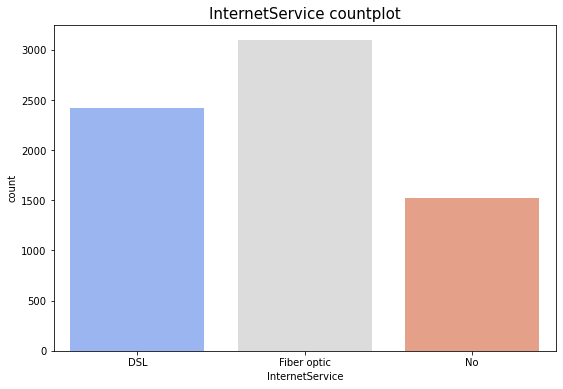

In [21]:
countplot_function(dataframe =data, column = "InternetService", palette = 'coolwarm')


### Contract Countplot

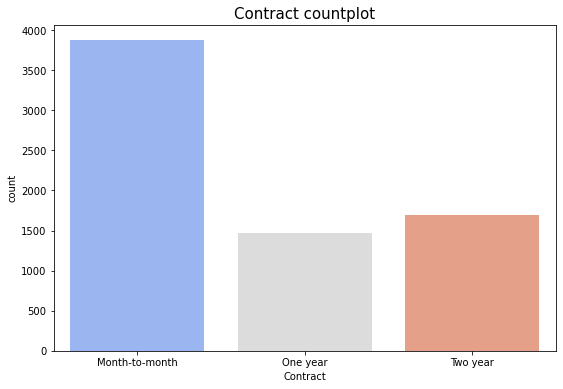

In [22]:
countplot_function(dataframe =data, column = "Contract", palette = 'coolwarm')


### Payment Method Countplot

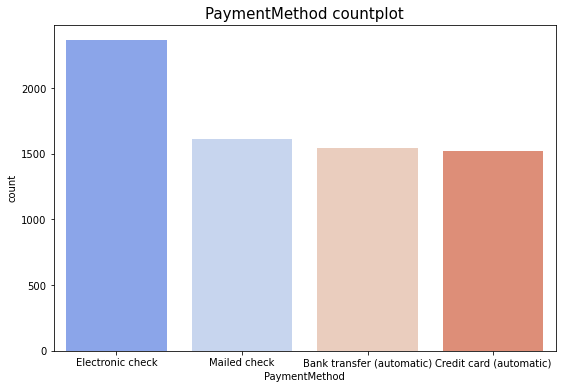

In [23]:
countplot_function(dataframe =data, column = "PaymentMethod", palette = 'coolwarm')


### Univariate and Bivariate Analysis

In [24]:
def uni(dataframe, col, figsize = (8,5), palette = "viridis"):
    
    plt.figure(figsize = figsize)

    sns.countplot(data=data,x=col,order=data[col].value_counts().index,hue='Churn',palette='viridis')
    plt.title("Churn Rate by {} ".format(col), fontsize = 15)

    plt.xlabel("{}".format(col), fontsize = 15)

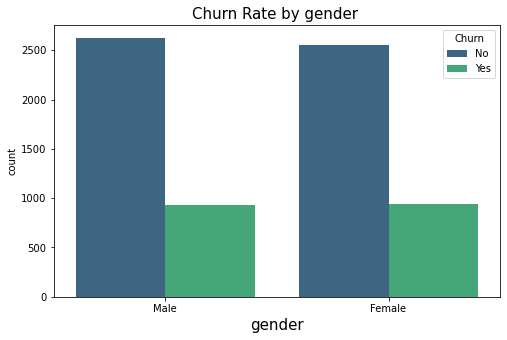

In [25]:
uni(dataframe=data,col='gender')

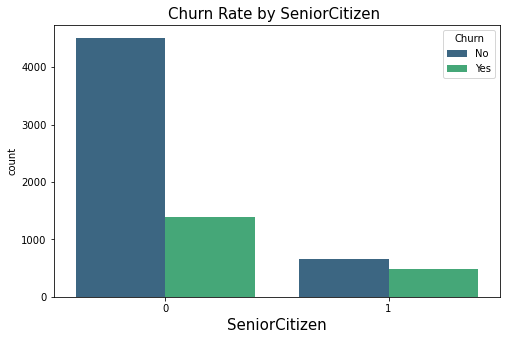

In [26]:
uni(dataframe=data,col='SeniorCitizen')

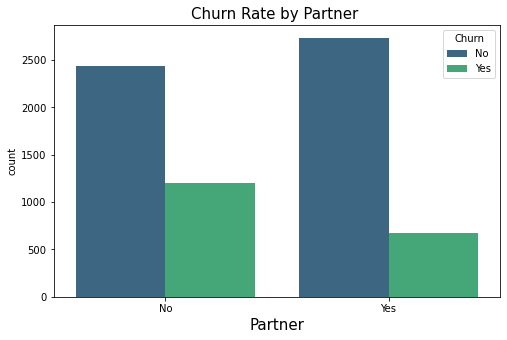

In [27]:
uni(dataframe=data,col='Partner')

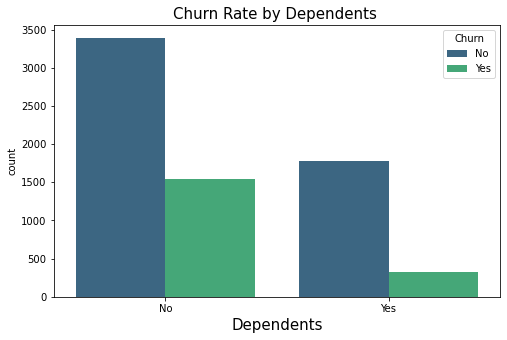

In [28]:
uni(dataframe=data,col='Dependents')

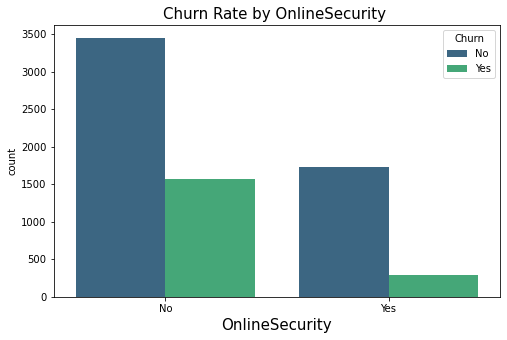

In [29]:
uni(dataframe=data,col='OnlineSecurity')

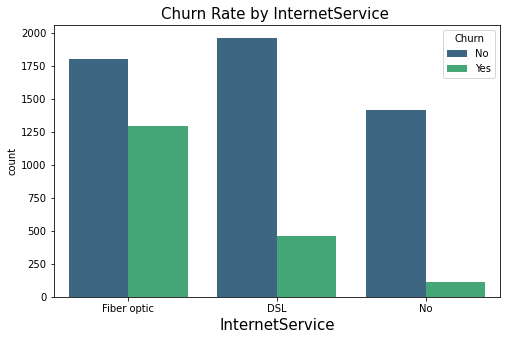

In [30]:
uni(dataframe=data,col='InternetService')

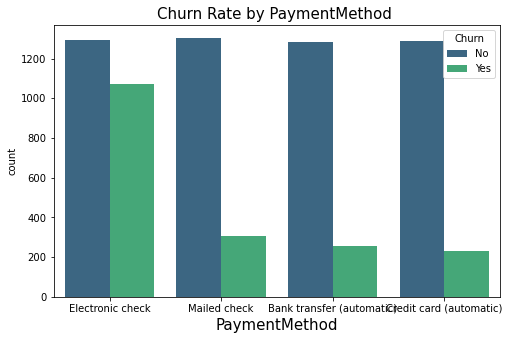

In [31]:
uni(dataframe=data,col='PaymentMethod')

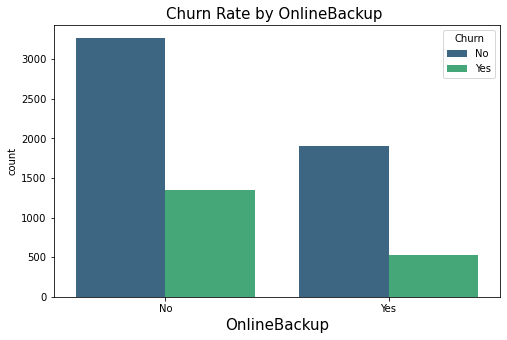

In [32]:
uni(dataframe=data,col='OnlineBackup')

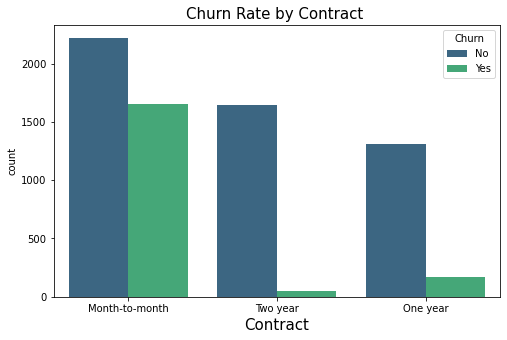

In [33]:
uni(dataframe=data,col='Contract')

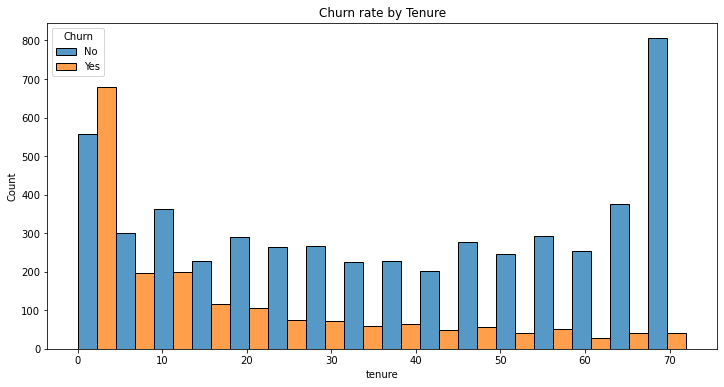

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(x='tenure',hue='Churn',data=data,multiple='dodge')
plt.title('Churn rate by Tenure')
plt.show()

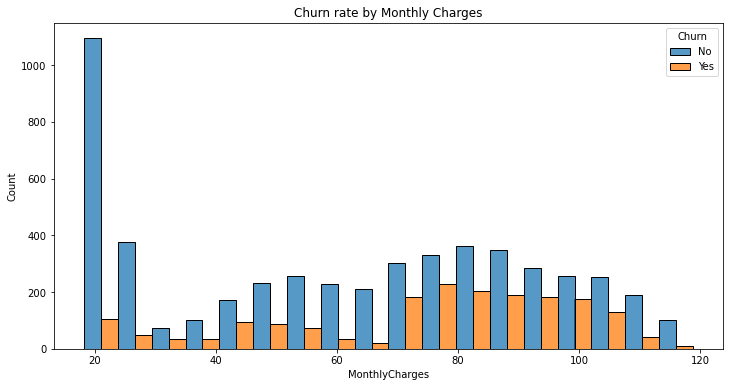

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(x='MonthlyCharges',hue='Churn',data=data,multiple='dodge')
plt.title('Churn rate by Monthly Charges')
plt.show()

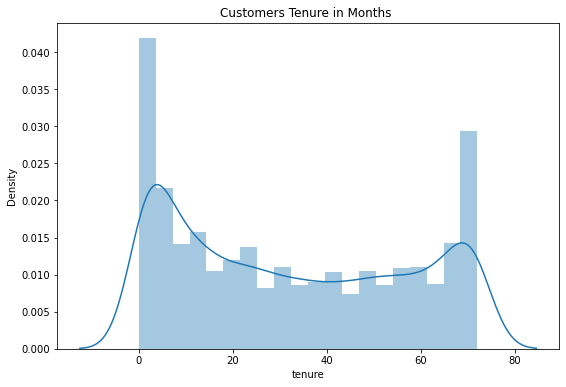

In [36]:
# distribution of customers based on tenure

plt.figure(figsize=(9,6))
sns.distplot(data.tenure,bins=20)
plt.title('Customers Tenure in Months ')
plt.show()

### Box Plot

In [37]:
def boxplot(dataframe, x, y, title_size = 15, label_size = 12, figsize = (10, 6), palette = "viridis"):
    plt.figure(figsize = (figsize))
    sns.boxplot(x = x, y = y, data = data, palette = palette)
    plt.xlabel("{} Value".format(x), fontsize = label_size)
    plt.ylabel("{} Value".format(y), fontsize = label_size)
    plt.title("{} Vs. {} Boxplot".format(x, y), fontsize = title_size)
    

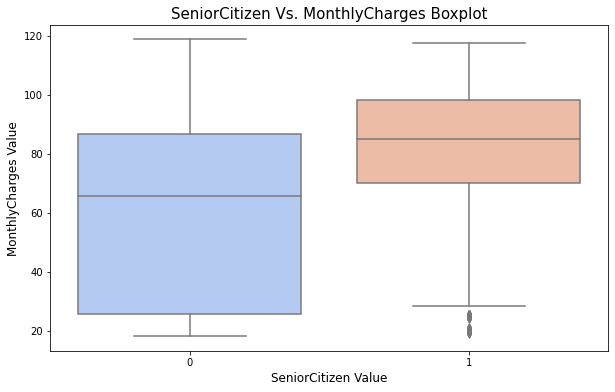

In [38]:
boxplot(dataframe = data, x = "SeniorCitizen", y = "MonthlyCharges", palette = "coolwarm")


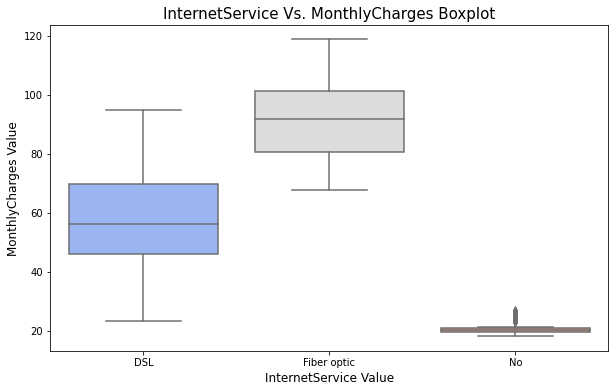

In [39]:
boxplot(dataframe = data, x = "InternetService", y = "MonthlyCharges", palette = "coolwarm")


Fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn.

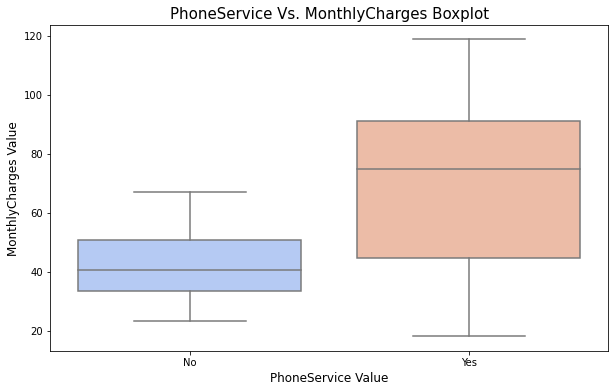

In [40]:

boxplot(dataframe = data, x = "PhoneService", y = "MonthlyCharges", palette = "coolwarm")


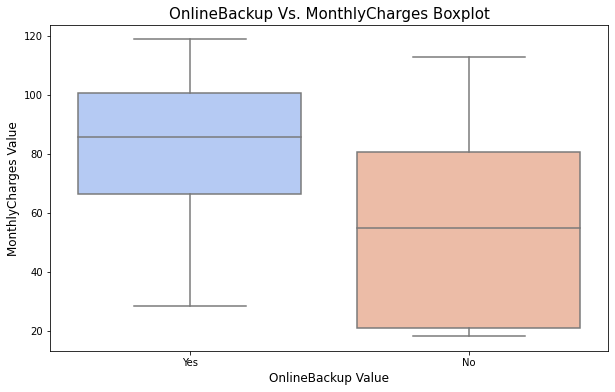

In [41]:
boxplot(dataframe = data, x = "OnlineBackup", y = "MonthlyCharges", palette = "coolwarm")


### Conclusions from above analysis:

- High Churn is seen in case of Month to Month contracts, Electroninc check as a payment method, No online security, No Tech     Support and Fibre optics Internet service.
- Low Churn is seen in case of Long term contracts, Subscriptions without internet service.
- As the Monthly charges increases Customers are likely to churn more
- Customers who have device protection are paying more
- Most of the customers are either new or have stayed for a long time with the company

In [42]:
# taking a copy of data

data2 = data.copy()

### Removing irrelevant features

In [43]:
data2['Churn'] = np.where(data2.Churn=='Yes',1,0)
data2['gender'] = np.where(data2.gender=='Male',1,0)

In [44]:
data2[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
0,0.269209
1,0.261603


Average churn rate for males and females are approximately the same which indicates gender variable does not bring a valuable prediction to a model.

In [45]:
data2['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [46]:
data2['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Customers who don't have phoneservice is also present in MultipleLines column. so its better to remove Phoneservice column

In [47]:
data2[['MonthlyCharges','tenure','TotalCharges']].head(3)

,MonthlyCharges,tenure,TotalCharges
0,29.85,1,29.85
1,56.95,34,1889.5
2,53.85,2,108.15


Total Charges is the product of Monthly charges and Tenure. so i am removing total charges from our dataset

In [48]:
# dropping those columns

data2.drop(['gender','customerID','TotalCharges','PhoneService'],axis=1,inplace=True)


In [49]:
data2.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1


### Converting Categorical columns to Dummy variables

In [50]:
# converting all categorical columns into dummy variables
cols = ['Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
final_data = pd.get_dummies(data2,columns=cols,drop_first=True)
final_data.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0
4,0,2,70.70,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


### Heatmap

Heatmap is a Good way to visualize our data, and helps to find the correlation between all set of features

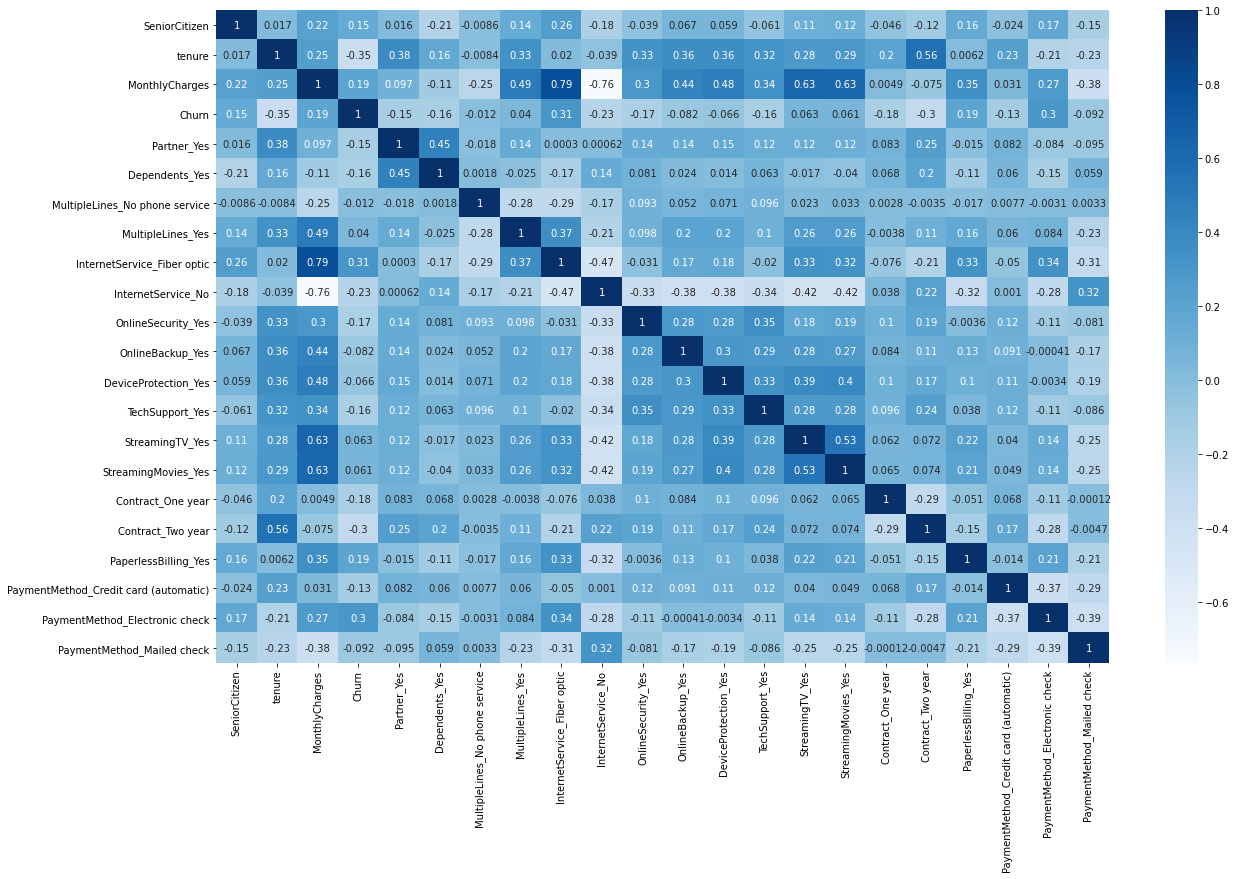

In [51]:
# heatmap to cheack the correlation between the variables

plt.figure(figsize=(20,12))
sns.heatmap(final_data.corr(),annot=True,cmap='Blues')
plt.show()

- From the above Heatmap it could be seen that there is a strong correlation between Tenure and Total Charges
- Monthly charges is negatively correlated with the customers who have not opted for internet service
- Monthly charges have strong correlation with Internet service Fibre optic

In [52]:
X = final_data.drop('Churn',axis=1)
y = final_data['Churn']

### Splitting Data into Training and Testing set

We split the Data into Training set and Validation set and Build the Model based on the records in the training set and Check the model performance on the Validation set. This is usually done to test the performance of our model on the unseen data(i,e test data).

In [53]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Feature Scaling

Feature scaling will be prefered most of the times for its quick results and interpretability of the variables.
scaling will done when the scale between two features are high.


In [54]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols_to_scale = ['MonthlyCharges','tenure']

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


## Model Building

In [56]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                            GLM   Df Residuals:                     5612
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2314.2
Date:                Tue, 01 Nov 2022   Deviance:                       4628.4
Time:                        21:55:30   Pearson chi2:                 5.70e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.5291      0.975     -0.542      0.588      -2.441       1.383
SeniorCitizen                             0.2453      0.096      2.555      0.011       0.057       0.434
tenure                                   -2.5775      0.193    -13.322      0.000      -2.957      -2.198
MonthlyCharges                           -0.6209      3.614     -0.172      0.864      -7.705       6.463
Partner_Yes                               0.0418      0.088      0.477      0.634      -0.130       0.214
Dependents_Yes                           -0.2304      0.101     -2.275      0.023      -0.429      -0.032
MultipleLines_No phone service            0.3311      0.736      0.450      0.653      -1.112       1.774
MultipleLines_Yes                         0.3991      0.200      1.997      0.046       0.007       0.791
InternetService_Fiber optic               1.0204      0.905      1.128      0.260      -0.753       2.794
InternetService_No                       -0.9329      0.915     -1.019      0.308      -2.727       0.861
OnlineSecurity_Yes                       -0.3054      0.202     -1.509      0.131      -0.702       0.091
OnlineBackup_Yes                         -0.1799      0.199     -0.906      0.365      -0.569       0.209
DeviceProtection_Yes                      0.0507      0.199      0.254      0.799      -0.340       0.441
TechSupport_Yes                          -0.2660      0.205     -1.297      0.194      -0.668       0.136
StreamingTV_Yes                           0.3991      0.369      1.080      0.280      -0.325       1.123
StreamingMovies_Yes                       0.2709      0.369      0.733      0.463      -0.453       0.995
Contract_One year                        -0.7536      0.122     -6.166      0.000      -0.993      -0.514
Contract_Two year                        -1.3285      0.195     -6.803      0.000      -1.711      -0.946
PaperlessBilling_Yes                      0.3637      0.084      4.343      0.000       0.200       0.528
PaymentMethod_Credit card (automatic)    -0.1326      0.131     -1.016      0.310      -0.388       0.123
PaymentMethod_Electronic check            0.3408      0.107      3.185      0.001       0.131       0.550
PaymentMethod_Mailed check                0.0328      0.128      0.257      0.797      -0.217       0.283
=========================================================================================================
"""

### Calculating VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [57]:
#checking vif of each feature

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [58]:
calc_vif(X_train[[i for i in X_train.columns]])

,variables,VIF
2,MonthlyCharges,64.096811
7,InternetService_Fiber optic,12.453193
1,tenure,7.694871
13,StreamingTV_Yes,3.582850
14,StreamingMovies_Yes,3.573035
16,Contract_Two year,3.386991
8,InternetService_No,3.108767
17,PaperlessBilling_Yes,2.986814
19,PaymentMethod_Electronic check,2.981639
3,Partner_Yes,2.822412


### Feature Elimination with RFE

In [59]:
# using logistic regression

logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=16)          
rfe = rfe.fit(X_train, y_train)

In [60]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('tenure', True, 1),
 ('MonthlyCharges', True, 1),
 ('Partner_Yes', False, 5),
 ('Dependents_Yes', True, 1),
 ('MultipleLines_No phone service', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', True, 1),
 ('DeviceProtection_Yes', False, 6),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', False, 2),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaperlessBilling_Yes', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 3),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 4)]

In [61]:
# storing the columns that supports the RFE in X_train
col = X_train.columns[rfe.support_]
col

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Dependents_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check'],
      dtype='object')

In [62]:
# The low significant predictors in the model.
X_train.columns[~rfe.support_]

Index(['Partner_Yes', 'DeviceProtection_Yes', 'StreamingMovies_Yes',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check'],
      dtype='object')

In [63]:
# checking p values
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                            GLM   Df Residuals:                     5617
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2315.7
Date:                Tue, 01 Nov 2022   Deviance:                       4631.5
Time:                        21:55:31   Pearson chi2:                 5.69e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.1381      0.238     -4.783      0.000      -1.604      -0.672
SeniorCitizen                      0.2498      0.095      2.616      0.009       0.063       0.437
tenure                            -2.5897      0.186    -13.887      0.000      -2.955      -2.224
MonthlyCharges                     1.6104      0.756      2.129      0.033       0.128       3.093
Dependents_Yes                    -0.2099      0.091     -2.295      0.022      -0.389      -0.031
MultipleLines_No phone service     0.7753      0.205      3.786      0.000       0.374       1.177
MultipleLines_Yes                  0.2889      0.097      2.986      0.003       0.099       0.478
InternetService_Fiber optic        0.4626      0.222      2.085      0.037       0.028       0.898
InternetService_No                -0.3539      0.255     -1.388      0.165      -0.854       0.146
OnlineSecurity_Yes                -0.4138      0.101     -4.086      0.000      -0.612      -0.215
OnlineBackup_Yes                  -0.2925      0.095     -3.082      0.002      -0.478      -0.106
TechSupport_Yes                   -0.3792      0.107     -3.536      0.000      -0.589      -0.169
StreamingTV_Yes                    0.1855      0.135      1.379      0.168      -0.078       0.449
Contract_One year                 -0.7581      0.122     -6.211      0.000      -0.997      -0.519
Contract_Two year                 -1.3375      0.195     -6.854      0.000      -1.720      -0.955
PaperlessBilling_Yes               0.3621      0.083      4.338      0.000       0.198       0.526
PaymentMethod_Electronic check     0.3755      0.078      4.797      0.000       0.222       0.529
==================================================================================================
"""

In [64]:
# checking vif
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.59
3,MonthlyCharges,42.02
7,InternetService_Fiber optic,9.80
8,InternetService_No,8.95
12,StreamingTV_Yes,3.66
5,MultipleLines_No phone service,2.89
14,Contract_Two year,2.57
2,tenure,2.55
11,TechSupport_Yes,1.84
6,MultipleLines_Yes,1.75


### Model Evaluation

In [65]:
# Predicting for Train set with .predict() method
y_train_pred = res.predict(X_train_sm)  
y_train_pred

2920    0.007436
2966    0.680653
6099    0.005482
5482    0.096831
2012    0.361154
          ...   
4931    0.727708
3264    0.614476
1653    0.007573
2607    0.750482
2732    0.140482
Length: 5634, dtype: float64

In [66]:
# Creating the dataframe for actual values and predicted probalities
y_train_pred = pd.DataFrame({'Churns':y_train.values, 'Prob':y_train_pred})

y_train_pred.head()

,Churns,Prob
2920,0,0.007436
2966,0,0.680653
6099,0,0.005482
5482,1,0.096831
2012,1,0.361154


### Taking Threshold = 0.5

Taking threshold = 0.5 i.e the values greater than 0.5 considered as Churns and less than 0.5 considered as not churns.

In [67]:
y_train_pred['Churn_predicted'] = y_train_pred.Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred.head()

,Churns,Prob,Churn_predicted
2920,0,0.007436,0
2966,0,0.680653,1
6099,0,0.005482,0
5482,1,0.096831,0
2012,1,0.361154,0


In [68]:
# calculating the accuracy of model

from sklearn import metrics
print("Accuracy = {}".format(metrics.accuracy_score(y_train_pred['Churns'], y_train_pred['Churn_predicted'])))

Accuracy = 0.805111821086262


In [69]:
# Calculating the confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred['Churns'], y_train_pred['Churn_predicted'] )
print(confusion)


[[3702  431]
 [ 667  834]]


In [70]:
# Let's see the sensitivity specificity of our logistic regression model
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Sensitivity = {}".format(TP / float(TP+FN)))
print("Specificity = {}".format(TN / float(TN+FP)))
print("False Positive Rate = {}".format(FP/ float(TN+FP)))

Sensitivity = 0.5556295802798135
Specificity = 0.8957173965642391
False Positive Rate = 0.10428260343576094


###  ROC AUC Curve

We can also understand the performance of the model by taking into account the AUC (Area under the curve) and checking if the values is close to 1. The higher is the value of AUC, the better the model is said to be performing

In [71]:
# Function to calculate and Plot ROC Curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

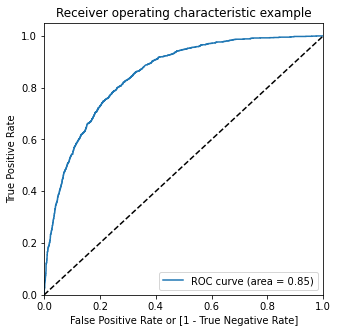

In [72]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred.Churns, y_train_pred.Prob, drop_intermediate = False )
draw_roc(y_train_pred.Churns, y_train_pred.Prob)


In [73]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred[i]= y_train_pred.Prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

,Churns,Prob,Churn_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
2920,0,0.007436,0,1,0,0,0,0,0,0,0,0,0
2966,0,0.680653,1,1,1,1,1,1,1,1,0,0,0
6099,0,0.005482,0,1,0,0,0,0,0,0,0,0,0
5482,1,0.096831,0,1,0,0,0,0,0,0,0,0,0
2012,1,0.361154,0,1,1,1,1,0,0,0,0,0,0


In [74]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred.Churns, y_train_pred[i])
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.266418     1.000000     0.000000
0.1          0.1  0.621051     0.947368     0.502541
0.2          0.2  0.718495     0.864091     0.665618
0.3          0.3  0.769436     0.758827     0.773288
0.4          0.4  0.793930     0.662891     0.841519
0.5          0.5  0.805112     0.555630     0.895717
0.6          0.6  0.801029     0.415723     0.940963
0.7          0.7  0.777068     0.224517     0.977740
0.8          0.8  0.745829     0.055296     0.996613
0.9          0.9  0.733582     0.000000     1.000000


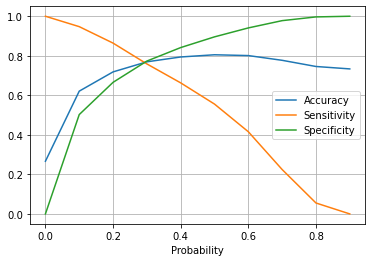

In [75]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.grid()
plt.show()

### Taking Threshold = 0.3

In [76]:
y_train_pred['Churn_pr_p'] = y_train_pred.Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred.head()

,Churns,Prob,Churn_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Churn_pr_p
2920,0,0.007436,0,1,0,0,0,0,0,0,0,0,0,0
2966,0,0.680653,1,1,1,1,1,1,1,1,0,0,0,1
6099,0,0.005482,0,1,0,0,0,0,0,0,0,0,0,0
5482,1,0.096831,0,1,0,0,0,0,0,0,0,0,0,0
2012,1,0.361154,0,1,1,1,1,0,0,0,0,0,0,1


In [77]:
# calculating accuracy
print(metrics.accuracy_score(y_train_pred.Churns, y_train_pred.Churn_pr_p))

0.7694355697550586


### Confusion Matrix

A confusion matrix would give us the values between the Actual and the Predicted outcomes

In [78]:
confusion2 = metrics.confusion_matrix(y_train_pred.Churns, y_train_pred.Churn_pr_p )
confusion2

array([[3196,  937],
       [ 362, 1139]], dtype=int64)

In [79]:
# Let's see the sensitivity and specificity of our logistic regression model

print("Sensitivity = {}".format(TP / float(TP+FN)))
print("Specificity = {}".format(TN / float(TN+FP)))

Sensitivity = 0.5556295802798135
Specificity = 0.8957173965642391


### Predictions on Test set

In [80]:
X_test_sm = sm.add_constant(X_test)

In [81]:
X_train_sm.columns

Index(['const', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'Dependents_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check'],
      dtype='object')

In [82]:
X_test_sm.head()

,const,SeniorCitizen,tenure,MonthlyCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2200,1.0,0,0.263889,0.397512,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
4627,1.0,0,0.833333,0.978607,0,0,0,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0
3225,1.0,0,0.180556,0.534328,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0
2828,1.0,0,0.013889,0.021891,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3768,1.0,0,0.763889,0.592040,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0


In [83]:
X_test_sm = X_test_sm[X_train_sm.columns]
X_test_sm.head()

,const,SeniorCitizen,tenure,MonthlyCharges,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Electronic check
2200,1.0,0,0.263889,0.397512,0,0,0,0,0,0,1,0,1,1,0,0,1
4627,1.0,0,0.833333,0.978607,0,0,1,1,0,1,1,1,1,1,0,1,0
3225,1.0,0,0.180556,0.534328,0,0,0,0,0,1,0,0,1,0,0,1,1
2828,1.0,0,0.013889,0.021891,0,0,0,0,1,0,0,0,0,0,1,0,0
3768,1.0,0,0.763889,0.592040,0,0,1,1,0,0,1,0,0,0,0,1,0


In [84]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2920    0.007436
2966    0.680653
6099    0.005482
5482    0.096831
2012    0.361154
156     0.604844
6562    0.786410
1495    0.130922
939     0.118677
3631    0.475285
dtype: float64

In [85]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2200    0.158311
4627    0.094086
3225    0.441301
2828    0.055718
3768    0.207214
4446    0.798573
2234    0.038003
5454    0.749882
1278    0.072225
578     0.464616
dtype: float64

In [86]:
y_test_pred = pd.DataFrame({'Churn':y_test.values, 'Prob':y_test_pred})
y_test_pred['CustID'] = y_test.index
y_test_pred.head()

,Churn,Prob,CustID
2200,0,0.158311,2200
4627,0,0.094086,4627
3225,0,0.441301,3225
2828,0,0.055718,2828
3768,0,0.207214,3768


In [87]:
y_test_pred['predicted'] = y_test_pred.Prob.map(lambda x: 1 if x > 0.3 else 0)

y_test_pred.head()

,Churn,Prob,CustID,predicted
2200,0,0.158311,2200,0
4627,0,0.094086,4627,0
3225,0,0.441301,3225,1
2828,0,0.055718,2828,0
3768,0,0.207214,3768,0


In [88]:
confusion3 = metrics.confusion_matrix(y_test_pred.Churn, y_test_pred.predicted)
print(confusion3)

[[789 252]
 [ 92 276]]


In [89]:
print("Accuracy = {}".format(metrics.accuracy_score(y_test_pred['Churn'], y_test_pred['predicted'])))


Accuracy = 0.7558552164655784


In [90]:
# Let's see the sensitivity and specificity of our logistic regression model

print("Sensitivity = {}".format(TP / float(TP+FN)))
print("Specificity = {}".format(TN / float(TN+FP)))

Sensitivity = 0.5556295802798135
Specificity = 0.8957173965642391


### Insights from Analysis

- High Churn is seen in case of Month to Month contracts, Electroninc check as a payment method, No online security, No Tech Support and Fibre optics Internet service.
- Low Churn is seen in case of Long term contracts, Subscriptions without internet service.
- As the Monthly charges increases Customers are likely to churn more
- Most of the customers are either new or have stayed for a long time with the company
- There is a strong correlation between Tenure and Total Charges
- Monthly charges is negatively correlated with the customers who have not opted for internet service
- Monthly charges have strong correlation with Internet service Fibre optic

### Model Performance

Training Accuracy :     80%                                                                                                  <br>Training Sensitivity : 55%
<br>Training Specificity : 89%
____

Testing Accuracy  :  75%
<br>Testing Sensitivity : 55%
<br>Testing Specificity : 89%

### Conclusion from Our model

1. It could be seen based on the results that our model are performing good with a accuracy of 75%


2. Therefore, the model would be able to predict whether a customer is going to churn (leave the service) or not with an accuracy of about 75% which is not bad for a model that contains imbalanced data along with less number of samples.


---

## Note: 
Here I tried to focus only on logistic regression algorithm but we can also use some other Algorithms like Random Forest or Decision tree or Naive bayes etc. to get more Accuracy. 